In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [2]:
dataset_path = '/content/drive/MyDrive/datasets/5Animals'

# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(265, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(4096, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [8]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=20)

Epoch 1/20
33/33 [==============================] - 40s 1s/step - loss: 1.5898 - accuracy: 0.2572 - val_loss: 1.4900 - val_accuracy: 0.3463
Epoch 2/20
33/33 [==============================] - 32s 991ms/step - loss: 1.3893 - accuracy: 0.3666 - val_loss: 1.3705 - val_accuracy: 0.4202
Epoch 3/20
33/33 [==============================] - 33s 996ms/step - loss: 1.3416 - accuracy: 0.3973 - val_loss: 1.3422 - val_accuracy: 0.4008
Epoch 4/20
33/33 [==============================] - 33s 1s/step - loss: 1.2863 - accuracy: 0.4194 - val_loss: 1.2722 - val_accuracy: 0.4397
Epoch 5/20
33/33 [==============================] - 32s 989ms/step - loss: 1.1988 - accuracy: 0.4894 - val_loss: 1.1413 - val_accuracy: 0.5136
Epoch 6/20
33/33 [==============================] - 32s 986ms/step - loss: 1.1074 - accuracy: 0.5422 - val_loss: 1.1609 - val_accuracy: 0.5097
Epoch 7/20
33/33 [==============================] - 33s 995ms/step - loss: 1.0008 - accuracy: 0.5777 - val_loss: 1.0701 - val_accuracy: 0.5370
Epoch

In [67]:
X_vall, Y_vall = dataset_validation[0]

Y_pred = model.predict(X_vall)

1/1 [==============================] - 0s 34ms/step


In [68]:
Y_vall = np.argmax(Y_vall, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

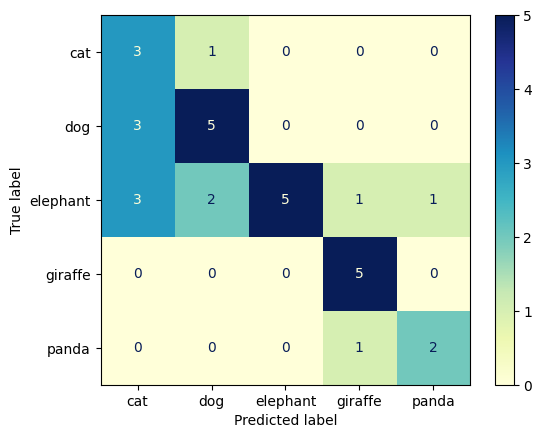

In [72]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['cat', 'dog', 'elephant', 'giraffe', 'panda'])

cm_display.plot(cmap='YlGnBu')
plt.show()

In [73]:
import cv2

In [77]:
img = cv2.imread('pics/giraffe.jpg')
img = cv2.resize(img, (224,224))
img = np.array(img)/255
img = np.expand_dims(img, axis=0)

output = model.predict(img)
output = np.argmax(output)

animals = ['cat', 'dog', 'elephant', 'giraffe', 'panda']
animal = animals[output]
print(animal)

1/1 [==============================] - 0s 75ms/step
giraffe
